In [18]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
import ast


In [19]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
reviews_df = pd.read_csv("./data/reviews.csv")

reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192112 entries, 0 to 192111
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   uid        192112 non-null  int64 
 1   profile    192112 non-null  object
 2   anime_uid  192112 non-null  int64 
 3   text       192112 non-null  object
 4   score      192112 non-null  int64 
 5   scores     192112 non-null  object
 6   link       192112 non-null  object
dtypes: int64(3), object(4)
memory usage: 10.3+ MB


In [21]:
reviews_df

,uid,profile,anime_uid,text,score,scores,link
0,255938,DesolatePsyche,34096,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938
1,259117,baekbeans,34599,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117
2,253664,skrn,28891,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664
3,8254,edgewalker00,2904,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=8254
4,291149,aManOfCulture99,4181,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=291149
...,...,...,...,...,...,...,...
192107,240067,Unicorn819,1281,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '5', 'Animation': '1...",https://myanimelist.net/reviews.php?id=240067
192108,285777,ShizzoSVH,1281,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=285777
192109,286904,AlluMan96,1281,\n \n \n \n ...,3,"{'Overall': '3', 'Story': '3', 'Animation': '1...",https://myanimelist.net/reviews.php?id=286904
192110,287903,AgentK300,1281,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '3', 'Animation': '...",https://myanimelist.net/reviews.php?id=287903


In [22]:
def clean_review(text):
    text = re.sub(r'^(.*more pics\s*Overall\s*\d+\s*Story\s*\d+\s*Animation\s*\d+\s*Sound\s*\d+\s*Character\s*\d+\s*Enjoyment\s*\d+\s*)', '', text, flags=re.DOTALL)
    text = text.strip()
    return text

reviews_df['cleaned_text'] = reviews_df['text'].apply(clean_review)

In [23]:
reviews_df

,uid,profile,anime_uid,text,score,scores,link,cleaned_text
0,255938,DesolatePsyche,34096,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938,"First things first. My ""reviews"" system is exp..."
1,259117,baekbeans,34599,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117,Let me start off by saying that Made in Abyss ...
2,253664,skrn,28891,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664,"Art 9/10: It is great, especially the actions ..."
3,8254,edgewalker00,2904,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=8254,Story \r\n \r\ntaking place 1 yr from where se...
4,291149,aManOfCulture99,4181,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=291149,Kyoto Animations greatest strength is being ab...
...,...,...,...,...,...,...,...,...
192107,240067,Unicorn819,1281,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '5', 'Animation': '1...",https://myanimelist.net/reviews.php?id=240067,"Ok, this anime is pretty old, but here's the b..."
192108,285777,ShizzoSVH,1281,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=285777,The dub for this anime is made this anime a fu...
192109,286904,AlluMan96,1281,\n \n \n \n ...,3,"{'Overall': '3', 'Story': '3', 'Animation': '1...",https://myanimelist.net/reviews.php?id=286904,Some might argue that doing a review of a show...
192110,287903,AgentK300,1281,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '3', 'Animation': '...",https://myanimelist.net/reviews.php?id=287903,Absolutely hilarious. \r\nI accidentally came ...


In [24]:
def extract_scores(score_dict):
    try:
        score_dict = ast.literal_eval(score_dict)
        return score_dict.get('Overall', 0), score_dict.get('Story', 0), score_dict.get('Animation', 0), score_dict.get('Sound', 0), score_dict.get('Character', 0), score_dict.get('Enjoyment', 0)
    except (ValueError, SyntaxError) as e:
        return 0, 0, 0, 0, 0, 0

reviews_df.drop(columns=['text'], inplace=True)
reviews_df[['Overall', 'Story', 'Animation', 'Sound', 'Character', 'Enjoyment']] = reviews_df['scores'].apply(extract_scores).apply(pd.Series)
reviews_df.drop(columns=['scores'], inplace=True)

reviews_df

,uid,profile,anime_uid,score,link,cleaned_text,Overall,Story,Animation,Sound,Character,Enjoyment
0,255938,DesolatePsyche,34096,8,https://myanimelist.net/reviews.php?id=255938,"First things first. My ""reviews"" system is exp...",8,8,8,10,9,8
1,259117,baekbeans,34599,10,https://myanimelist.net/reviews.php?id=259117,Let me start off by saying that Made in Abyss ...,10,10,10,10,10,10
2,253664,skrn,28891,7,https://myanimelist.net/reviews.php?id=253664,"Art 9/10: It is great, especially the actions ...",7,7,9,8,8,8
3,8254,edgewalker00,2904,9,https://myanimelist.net/reviews.php?id=8254,Story \r\n \r\ntaking place 1 yr from where se...,9,9,9,10,10,9
4,291149,aManOfCulture99,4181,10,https://myanimelist.net/reviews.php?id=291149,Kyoto Animations greatest strength is being ab...,10,10,8,9,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...
192107,240067,Unicorn819,1281,9,https://myanimelist.net/reviews.php?id=240067,"Ok, this anime is pretty old, but here's the b...",9,5,10,10,9,9
192108,285777,ShizzoSVH,1281,9,https://myanimelist.net/reviews.php?id=285777,The dub for this anime is made this anime a fu...,9,7,9,9,9,10
192109,286904,AlluMan96,1281,3,https://myanimelist.net/reviews.php?id=286904,Some might argue that doing a review of a show...,3,3,1,2,2,5
192110,287903,AgentK300,1281,10,https://myanimelist.net/reviews.php?id=287903,Absolutely hilarious. \r\nI accidentally came ...,10,3,3,3,3,10


In [25]:
print("Basic Data Overview:")
print(reviews_df.info())
print("\nDescriptive Statistics:")
print(reviews_df.describe())

Basic Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192112 entries, 0 to 192111
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   uid           192112 non-null  int64 
 1   profile       192112 non-null  object
 2   anime_uid     192112 non-null  int64 
 3   score         192112 non-null  int64 
 4   link          192112 non-null  object
 5   cleaned_text  192112 non-null  object
 6   Overall       192112 non-null  object
 7   Story         192112 non-null  object
 8   Animation     192112 non-null  object
 9   Sound         192112 non-null  object
 10  Character     192112 non-null  object
 11  Enjoyment     192112 non-null  object
dtypes: int64(3), object(9)
memory usage: 17.6+ MB
None

Descriptive Statistics:
                 uid      anime_uid          score
count  192112.000000  192112.000000  192112.000000
mean   187648.127525   15273.300283       7.570235
std     98748.902397   13480.565

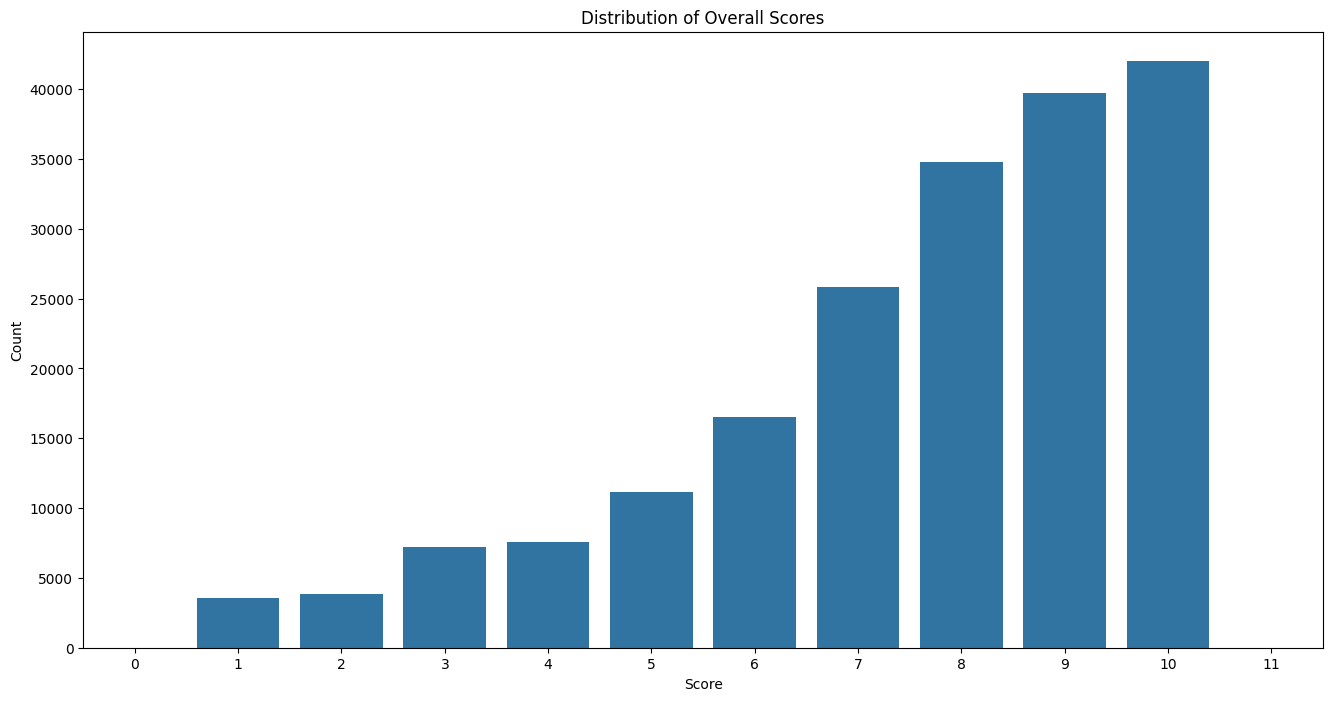

In [26]:
plt.figure(figsize=(16, 8))
sns.countplot(x='score', data=reviews_df)
plt.title('Distribution of Overall Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

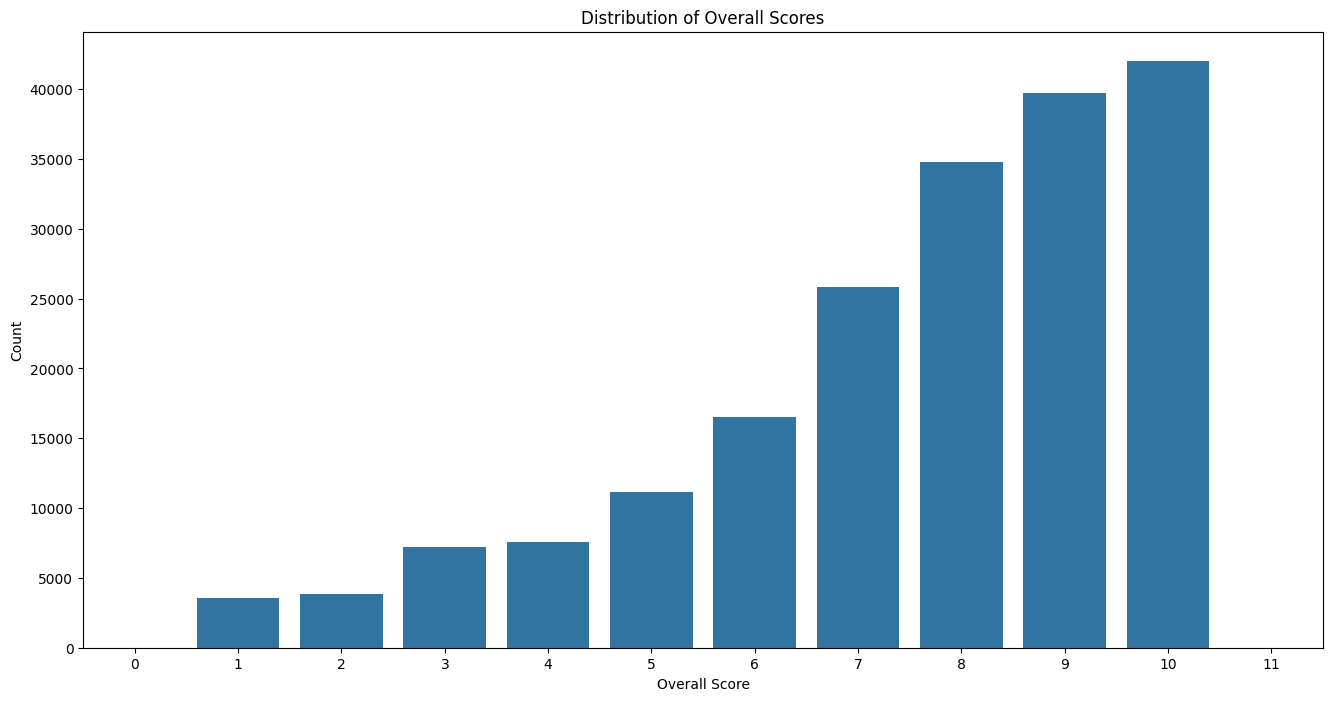

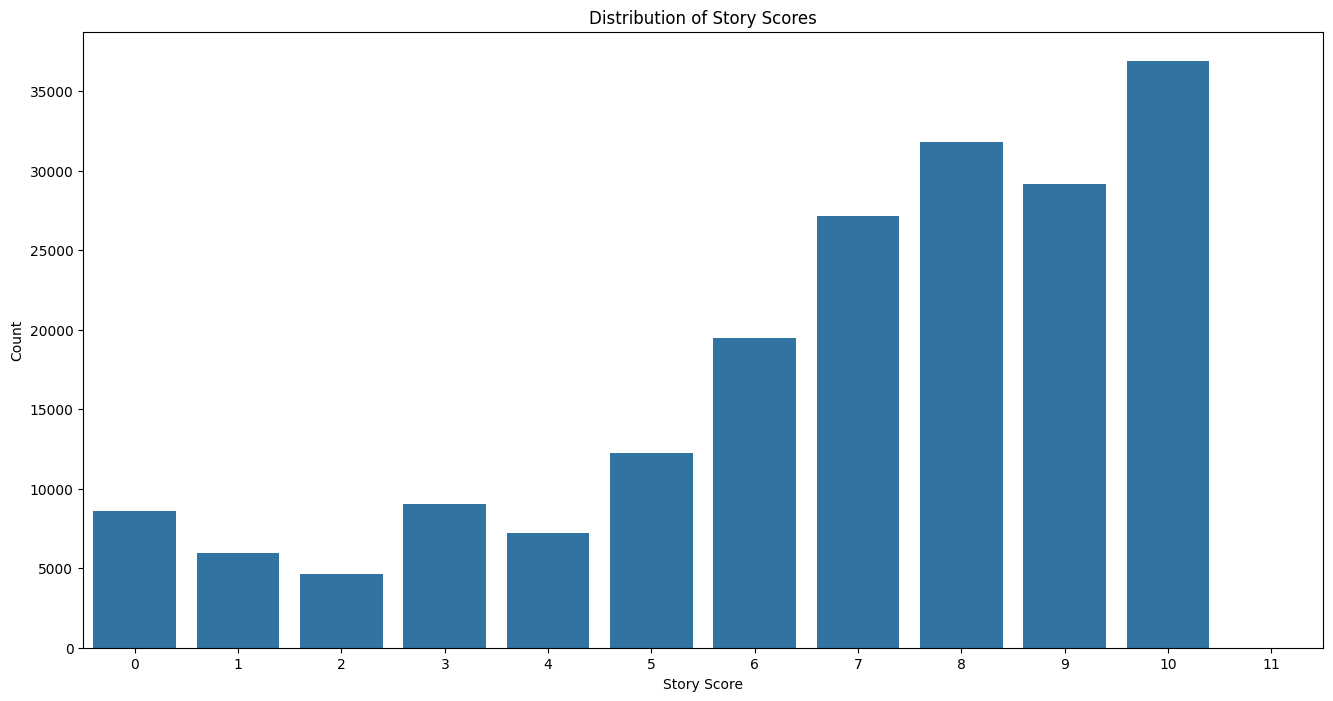

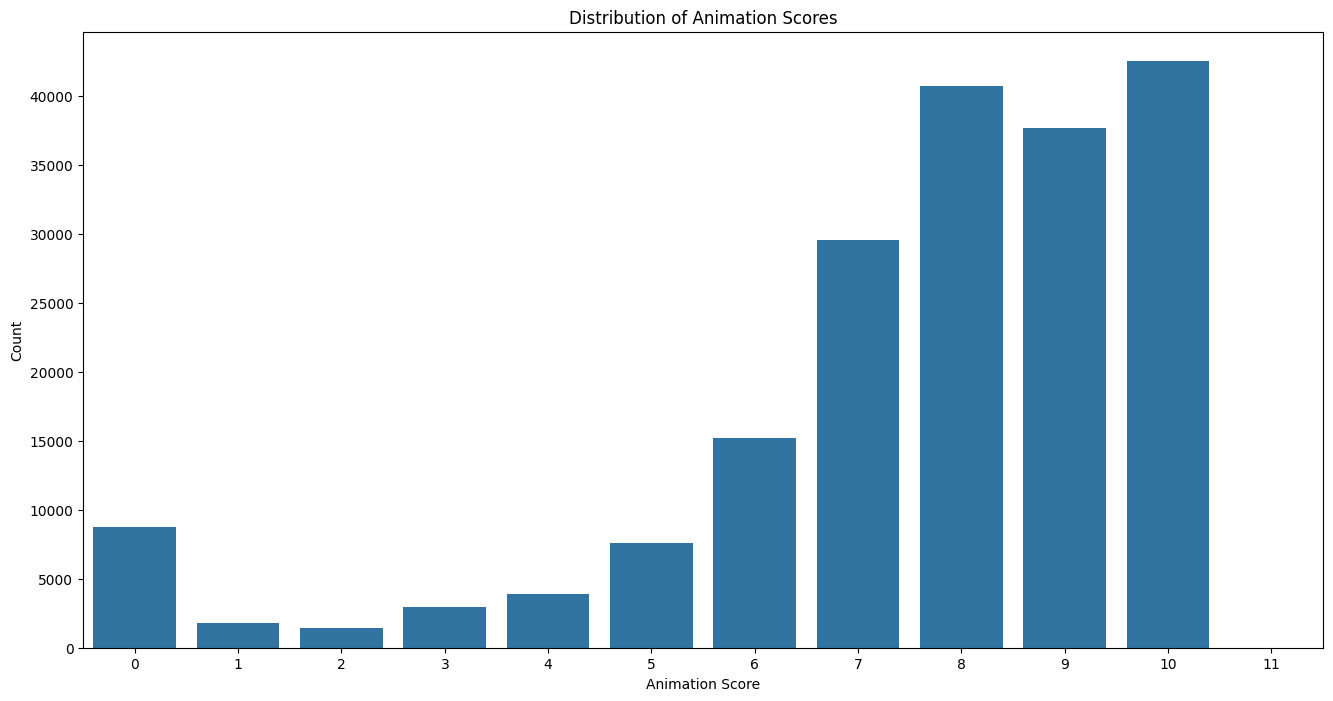

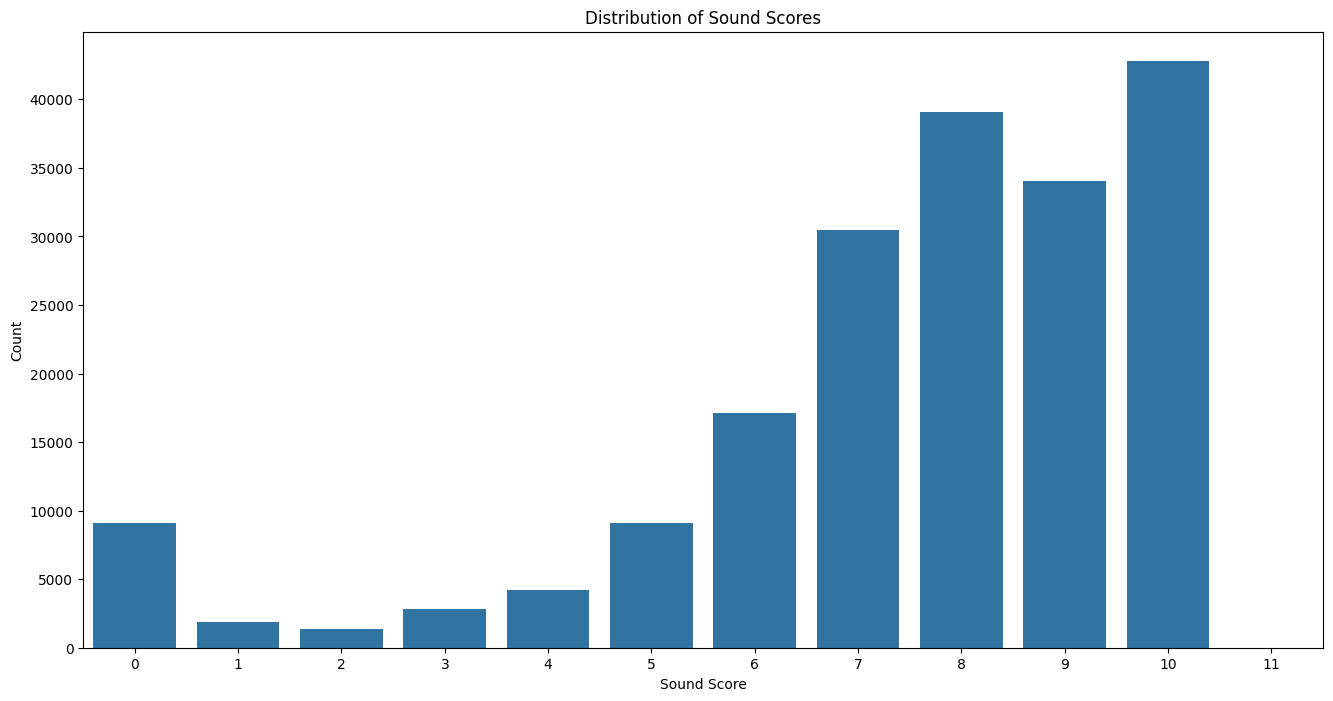

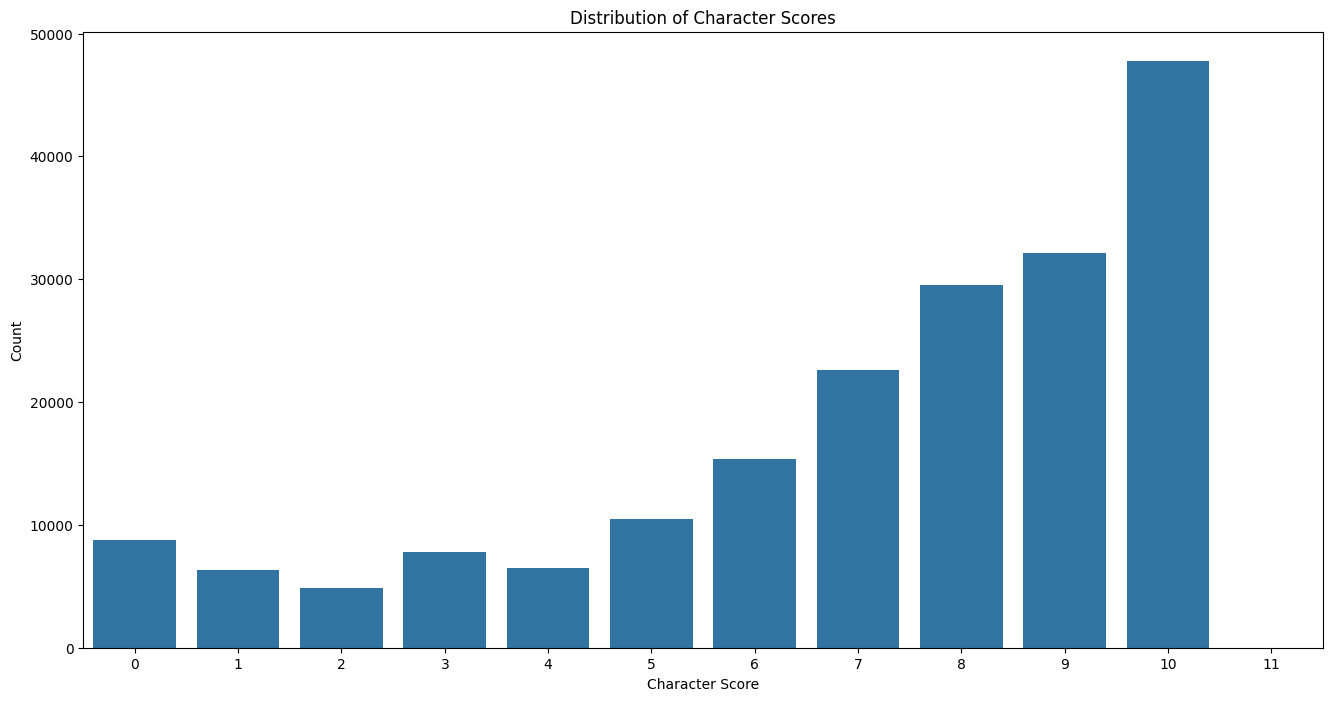

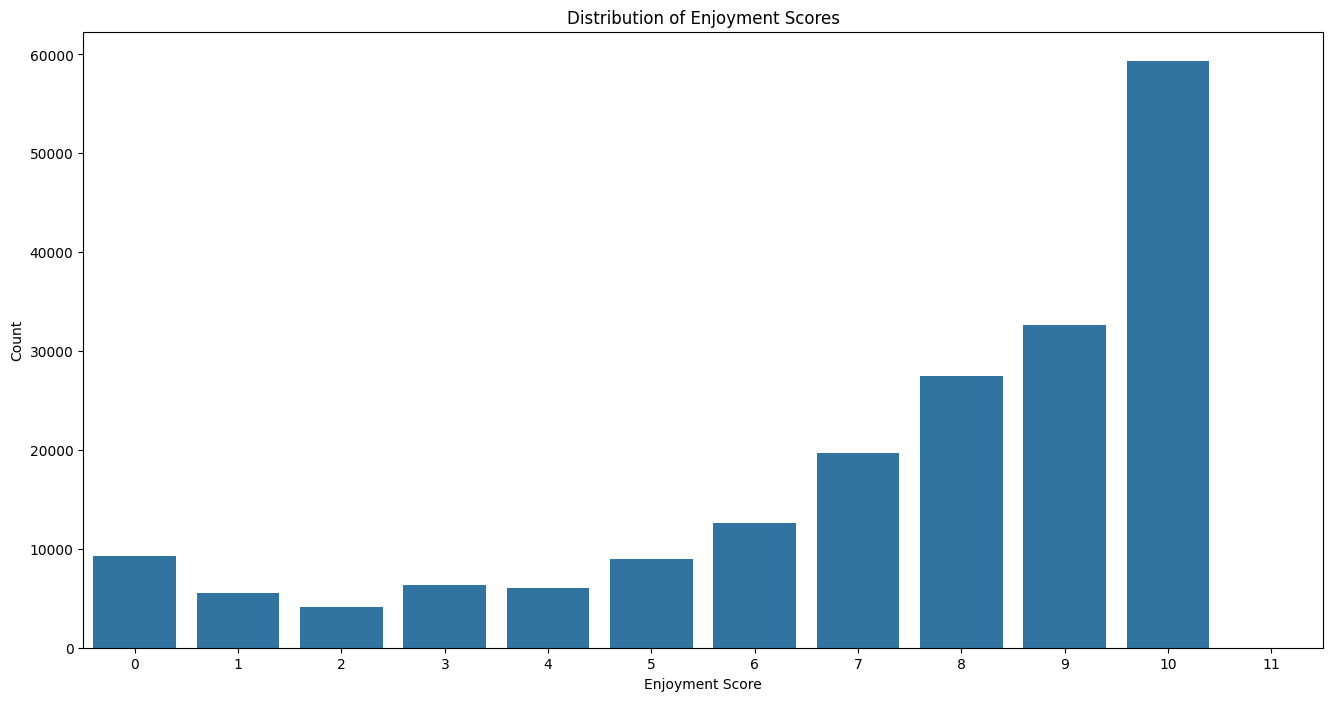

In [27]:
individual_scores = ['Overall', 'Story', 'Animation', 'Sound', 'Character', 'Enjoyment']
for score in individual_scores:
    reviews_df[score] = reviews_df[score].astype(int)

for score in individual_scores:
    plt.figure(figsize=(16, 8))
    sns.countplot(x=score, data=reviews_df)
    plt.title(f'Distribution of {score} Scores')
    plt.xlabel(f'{score} Score')
    plt.ylabel('Count')
    plt.show()

In [28]:
all_text = ' '.join(reviews_df['cleaned_text'])
words = all_text.split()
words = [word for word in words if word.lower() not in stop_words]
word_freq = Counter(words)

print("\nMost Common Words:")
print(word_freq.most_common(10))


Most Common Words:
[('anime', 454608), ('like', 391120), ('characters', 341766), ('really', 313606), ('one', 309718), ('show', 292588), ('story', 286643), ('character', 239396), ('good', 197956), ('series', 196065)]


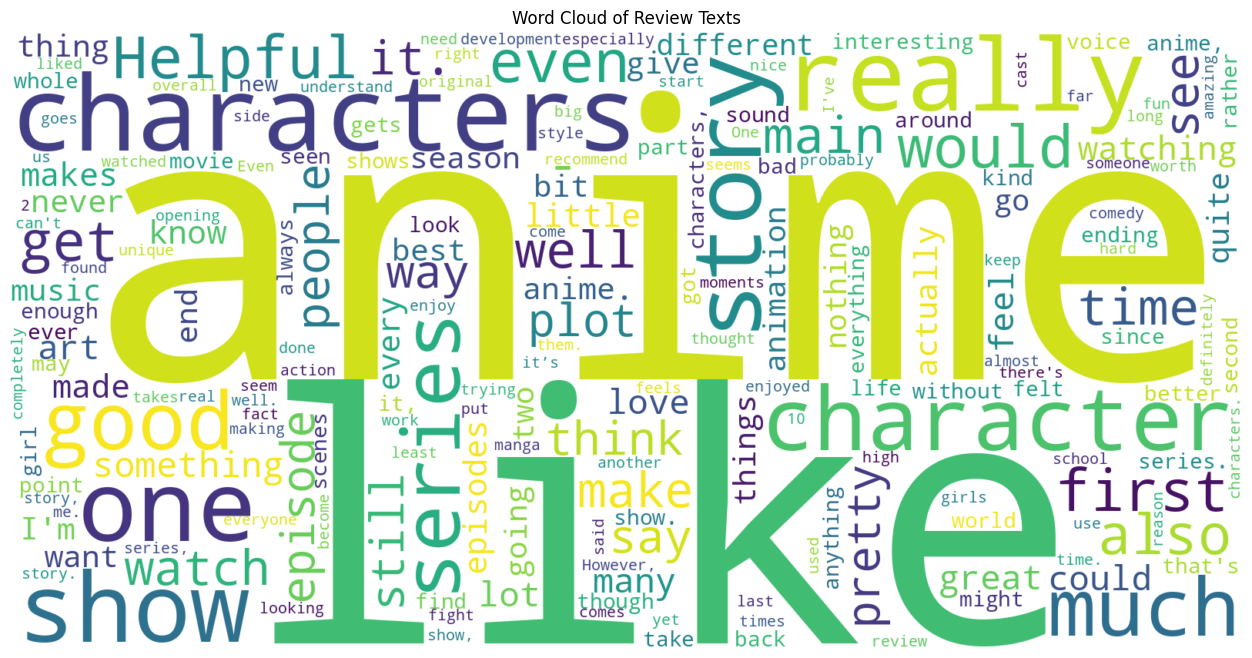

In [29]:
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Texts')
plt.show()

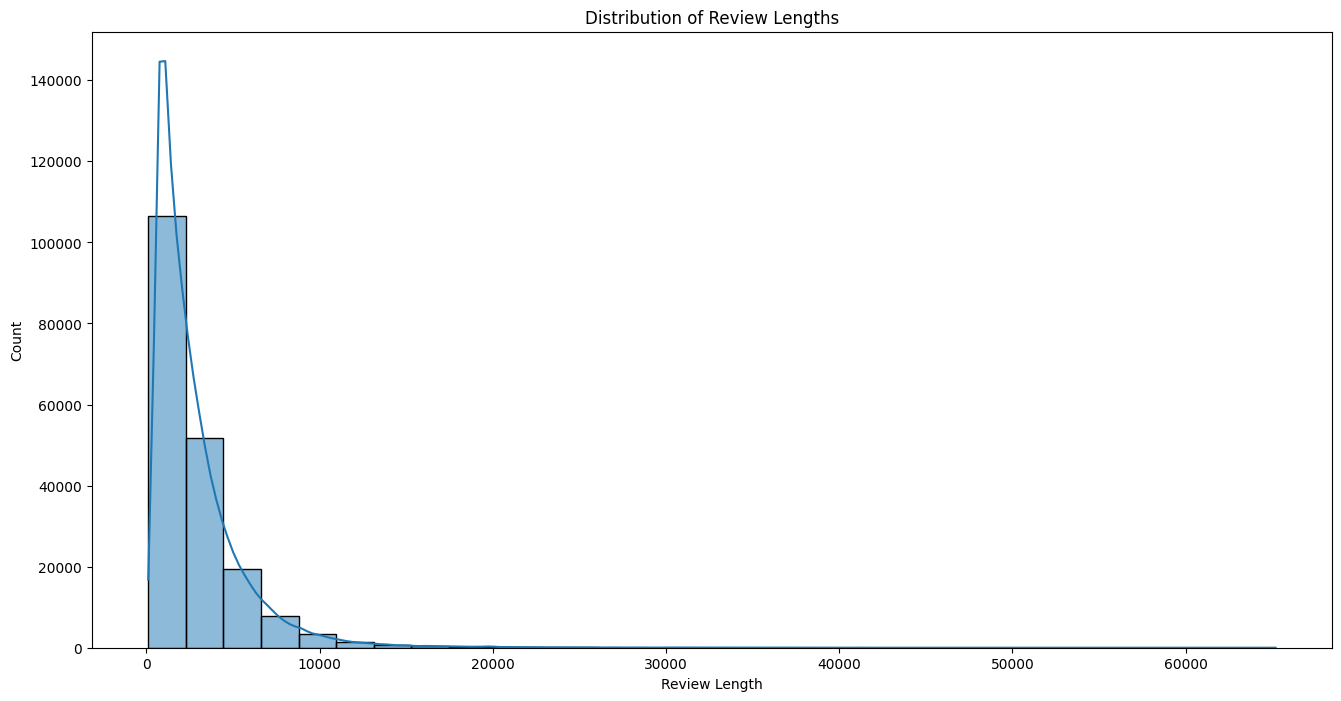

In [30]:
reviews_df['review_length'] = reviews_df['cleaned_text'].apply(len)
plt.figure(figsize=(16, 8))
sns.histplot(reviews_df['review_length'], bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

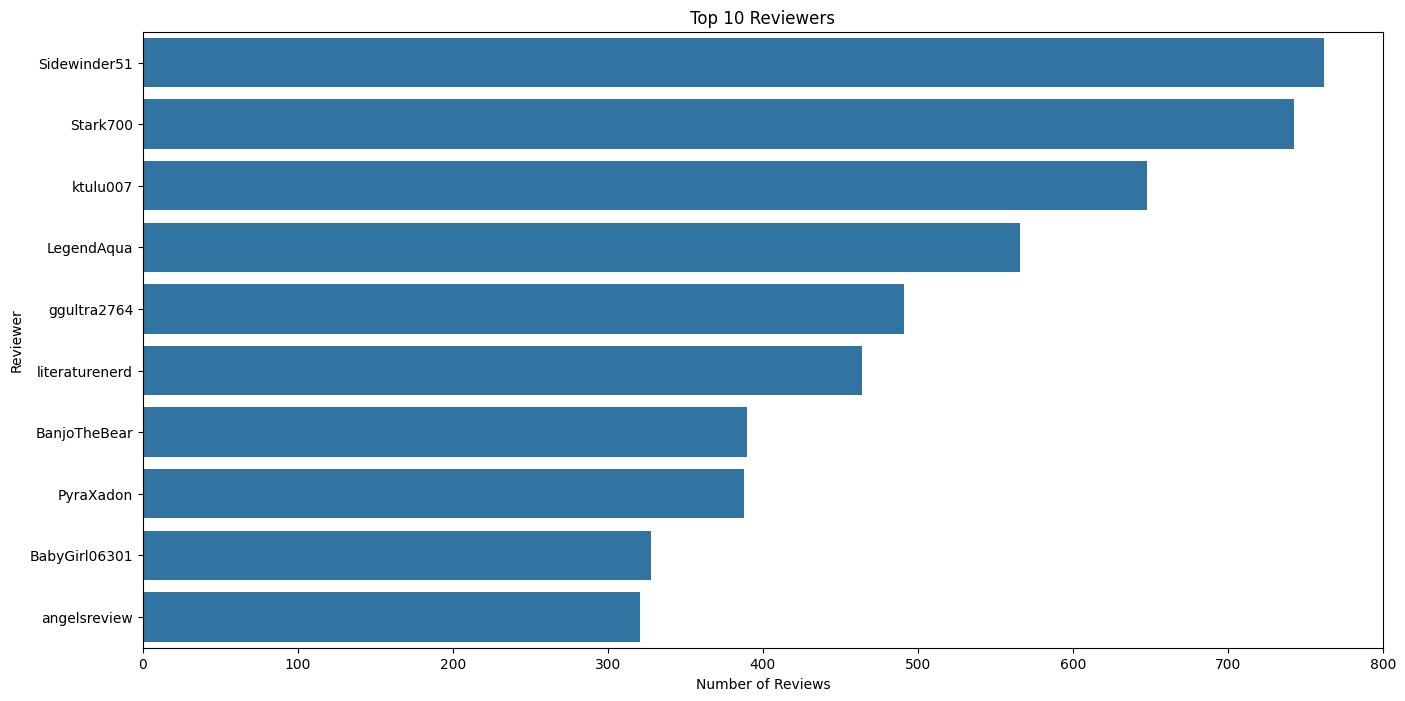

In [31]:
top_reviewers = reviews_df['profile'].value_counts().head(10)
plt.figure(figsize=(16, 8))
sns.barplot(x=top_reviewers.values, y=top_reviewers.index)
plt.title('Top 10 Reviewers')
plt.xlabel('Number of Reviews')
plt.ylabel('Reviewer')
plt.show()

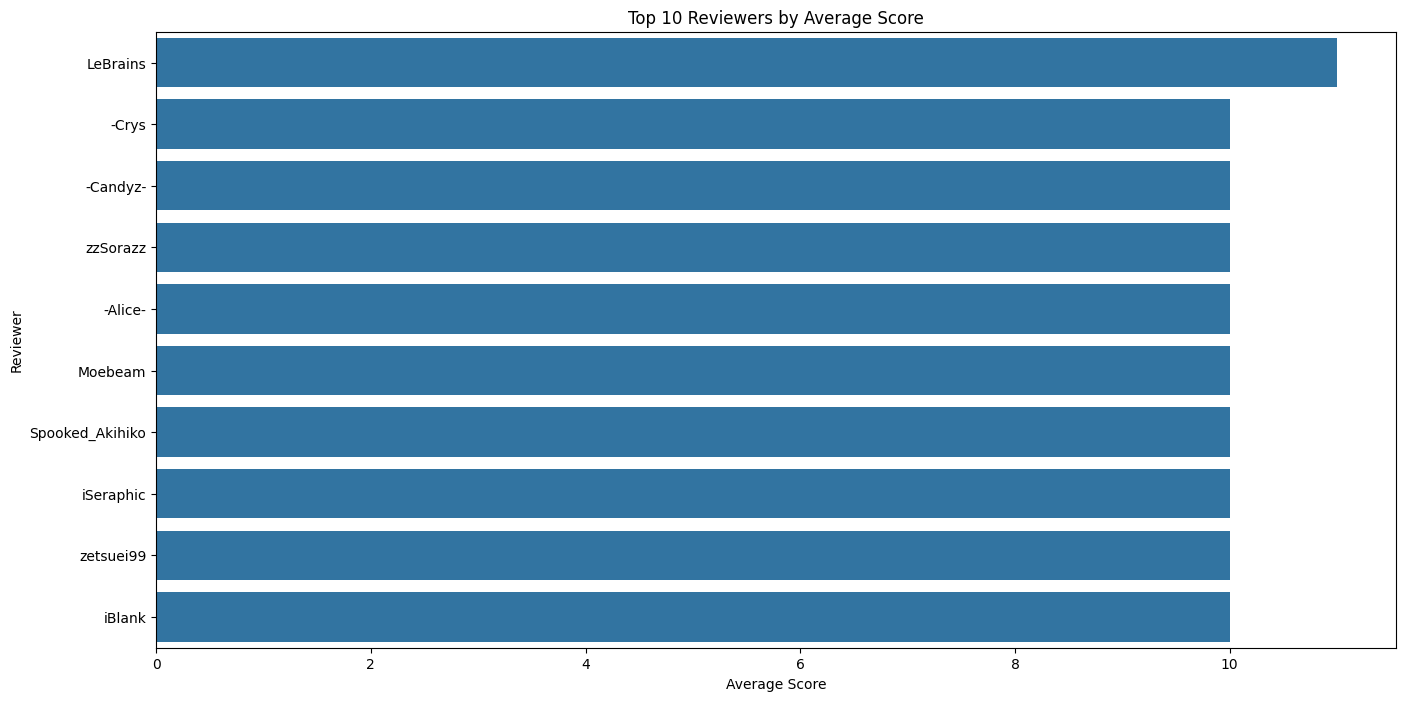

In [32]:
average_scores_by_reviewer = reviews_df.groupby('profile')['score'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(16, 8))
sns.barplot(x=average_scores_by_reviewer.values, y=average_scores_by_reviewer.index)
plt.title('Top 10 Reviewers by Average Score')
plt.xlabel('Average Score')
plt.ylabel('Reviewer')
plt.show()

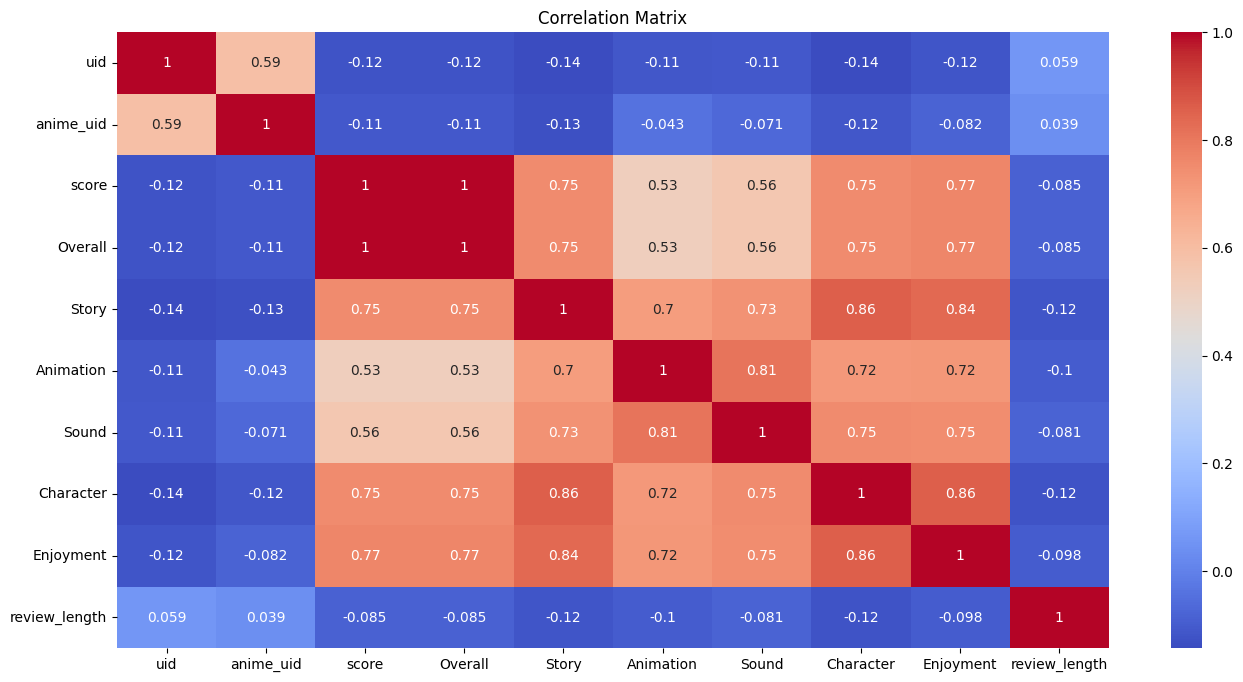

In [33]:
numeric_df = reviews_df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(16, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [34]:
lebrains = reviews_df[reviews_df['profile'] == "LeBrains"]
lebrains

,uid,profile,anime_uid,score,link,cleaned_text,Overall,Story,Animation,Sound,Character,Enjoyment,review_length
119190,252847,LeBrains,413,11,https://myanimelist.net/reviews.php?id=252847,"A contemporanean masterpiece. The looks, the s...",11,11,11,11,11,11,1203
